In [108]:
#由維基百科上取得PRODUCE系列選秀節目三季的資料，並整理。
#由韓國Naver網站查詢搜尋趨勢，並整理。

In [130]:
#name=參賽者姓名
#season=第幾季，共三季
#stage=第幾階段，共四階段
#vote=票數(單位：萬)
#search=參賽者間相較之搜尋趨勢
#age=年齡

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

pd = pd.read_csv("C:/Users/user/Desktop/produce_vote.csv")
pd.shape

(622, 6)

In [110]:
pd.head()

,name,season,stage,vote,search,age
0,Jeon So-mi,1,4,85.83,6.99526,15
1,Kim Se-jeong,1,4,52.54,5.89883,20
2,Choi Yoo-jung,1,4,43.88,1.65724,16
3,Kim Chung-ha,1,4,40.36,0.14694,20
4,Kim So-hye,1,4,22.97,1.56344,17


In [111]:
pd.tail()

,name,season,stage,vote,search,age
617,Kim Yu-bin,3,1,3.41,0.01681,15
618,Cho Sa-rang,3,1,3.40,0.00789,16
619,Choi So-eun,3,1,3.14,0.00576,18
620,Ayana Shinozaki,3,1,3.05,0.01987,22
621,Won Seo-yeon,3,1,3.01,0.00894,18


In [113]:
#將資料分成三季

pd_s1 = pd[pd["season"] == 1]
pd_s2 = pd[pd["season"] == 2]
pd_s3 = pd[pd["season"] == 3]

#三季分別做敘述統計(小數點兩位)

#第一季的敘述統計

pd_s1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,215.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
stage,215.0,1.92,1.01,1.00,1.00,2.00,3.00,4.00
vote,215.0,17.23,23.85,0.23,2.78,8.83,21.50,147.36
search,215.0,2.52,6.13,0.00,0.04,0.26,2.09,48.98
age,215.0,19.35,3.18,14.00,17.00,19.00,21.00,29.00


In [114]:
#第二季的敘述統計

pd_s2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,209.0,2.00,0.00,2.0,2.00,2.00,2.00,2.00
stage,209.0,1.90,1.00,1.0,1.00,2.00,3.00,4.00
vote,209.0,50.14,51.91,3.2,11.64,33.01,75.21,281.18
search,209.0,1.45,3.36,0.0,0.06,0.41,1.35,28.62
age,209.0,20.19,2.97,14.0,18.00,20.00,22.00,29.00


In [115]:
#第三季的敘述統計
pd_s3.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,198.0,3.00,0.00,3.00,3.00,3.00,3.00,3.00
stage,198.0,1.89,1.00,1.00,1.00,2.00,2.75,4.00
vote,198.0,26.75,21.76,3.01,9.48,22.49,33.39,101.06
search,198.0,1.00,2.37,0.00,0.05,0.16,0.64,21.93
age,198.0,18.08,2.79,13.00,16.00,18.00,20.00,24.00


In [ ]:
#想了解參賽者在網路上的搜尋趨勢，是否會影響投票數的多寡。

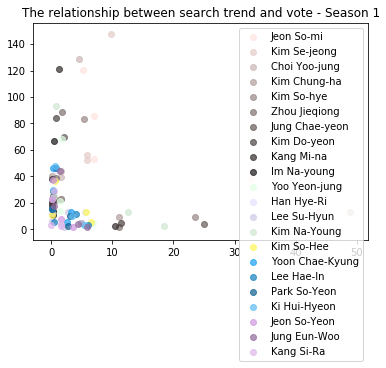

In [116]:
#X軸為search，Y軸為vote，了解第一季前22名參賽者在總共4輪的投票中搜尋趨勢與投票數的關係

hex_colors = ["#ffe4e1", "#e5cdca", "#ccb6b4", "#b29f9d", "#998887", "#7f7270", "#665b5a", "#4c4443", "#332d2d", "#191616", "#e1ffe4", "#e4e1ff", "#cdcae5", "#cfe7d2", "#fef65b", "#1ca1f2", "#1680c1", "#106091", "#60bdf5", "#d199e1", "#926b9d", "#deb7ea"]
name = pd_s1["name"].unique()
for col, name in zip(hex_colors, name):
  subset_df = pd_s1[pd_s1["name"] == name]
  plt.scatter(subset_df["search"], subset_df["vote"], color=col, alpha=0.7, label=name)

plt.legend()
plt.title("The relationship between search trend and vote - Season 1")
plt.show()

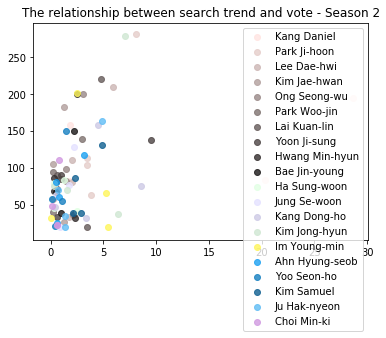

In [117]:
#X軸為search，Y軸為vote，了解第二季前20名參賽者在總共4輪的投票中搜尋趨勢與投票數的關係。

hex_colors = ["#ffe4e1", "#e5cdca", "#ccb6b4", "#b29f9d", "#998887", "#7f7270", "#665b5a", "#4c4443", "#332d2d", "#191616", "#e1ffe4", "#e4e1ff", "#cdcae5", "#cfe7d2", "#fef65b", "#1ca1f2", "#1680c1", "#106091", "#60bdf5", "#d199e1"]
name = pd_s2["name"].unique()
for col, name in zip(hex_colors, name):
  subset_df = pd_s2[pd_s2["name"] == name]
  plt.scatter(subset_df["search"], subset_df["vote"], color=col, alpha=0.8, label=name)

plt.legend()
plt.title("The relationship between search trend and vote - Season 2")
plt.show()

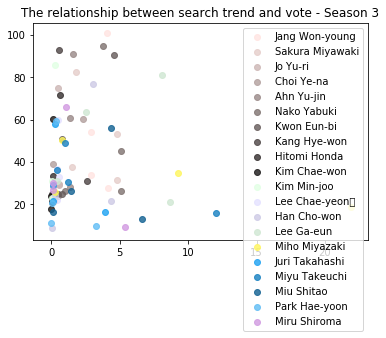

In [118]:
#X軸為search，Y軸為vote，了解第三季前20名參賽者在總共4輪的投票中搜尋趨勢與投票數的關係

hex_colors = ["#ffe4e1", "#e5cdca", "#ccb6b4", "#b29f9d", "#998887", "#7f7270", "#665b5a", "#4c4443", "#332d2d", "#191616", "#e1ffe4", "#e4e1ff", "#cdcae5", "#cfe7d2", "#fef65b", "#1ca1f2", "#1680c1", "#106091", "#60bdf5", "#d199e1"]
name = pd_s3["name"].unique()
for col, name in zip(hex_colors, name):
  subset_df = pd_s3[pd_s3["name"] == name]
  plt.scatter(subset_df["search"], subset_df["vote"], color=col, alpha=0.8, label=name)

plt.legend()
plt.title("The relationship between search trend and vote - Season 3")
plt.show()

In [119]:
pd_s = pd.groupby("season")
pd_v = pd_s["vote"].sum()
pd_v.index

Int64Index([1, 2, 3], dtype='int64', name='season')

In [120]:
pd_v.values

array([ 3703.51, 10479.14,  5297.02])

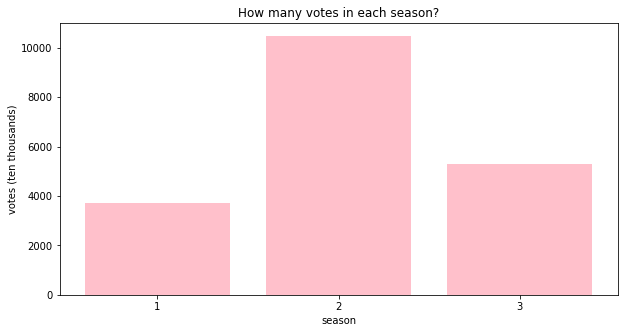

In [132]:
#了解每季的總投票數的差異
#第一季及第三季的參賽者全部為女性，第二季的參賽者全部為男性，想了解票數是否因此有差異。

import matplotlib.pyplot as plt
figure, axis = plt.subplots(figsize=(10, 5))
votes = len(pd_v.values)
plt.bar(range(votes), pd_v.values, color="pink")
plt.xticks(range(votes), pd_v.index)
plt.title("How many votes in each season?")
plt.xlabel("season")
plt.ylabel("votes (ten thousands)")
plt.show()

In [ ]:
#由上圖可知，參賽者為男生會使總投票數大幅增加。

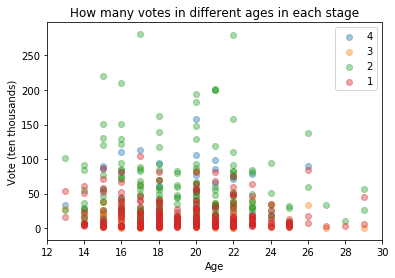

In [133]:
#了解每個不同年齡層票數在不同階段的分佈
#想了解年齡的不同是否影響每階段選秀節目參賽者的票數。

import matplotlib.pyplot as plt
import matplotlib.cm as cm

stage = pd["stage"].unique()
colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c"]
s_len = len(stage)

for i in range(s_len):
  pd_subset = pd[pd["stage"] == stage[i]]
  plt.scatter(pd_subset["age"], pd_subset["vote"], label=stage[i], cmap=cm.jet, alpha=0.4)

plt.xlabel("Age")
plt.ylabel("Vote (ten thousands)")
plt.title("How many votes in different ages in each stage")
plt.legend()
plt.show()

In [ ]:
#由上圖可知，參賽者年紀越小票數越高。